In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

In [2]:
##Data Aquisition
me = np.load('LO_3_0.01/NJ_LO_3_0.01_500000.npy', allow_pickle=True) #Matrix elements
momentum = np.load('LO_3_0.01/PS3_0.01_500000.npy', allow_pickle=True, encoding='bytes') #4-momenta of input states
momentum = np.array([np.array(element) for element in momentum])

In [3]:
##Minkowski product of 4-vectors p1, p2.
def m_prod_arr(p1, p2):
    #Input: p1, p2 - n x 4 dimensional numpy array.
    #Output: n dimensional numpy array.
    return np.multiply(p1[:,0], p2[:,0]) - np.sum(np.multiply(p1[:,1:], p2[:,1:]), axis=1)

In [4]:
def m_prod(p1, p2):
    return np.multiply(p1[0], p2[0]) - np.sum(np.multiply(p1[1:], p2[1:]))

In [5]:
#Helpful sums
p_12 = np.sum(np.array(momentum)[:,2:4], axis=1) #p1+p2
p_13 = np.sum(np.array(momentum)[:,2:5:2], axis=1) #p1+p3
p_23 = np.sum(np.array(momentum)[:,3:5], axis=1) #p2+p3

In [6]:
s_12 = m_prod_arr(p_12, p_12)
s_13 = m_prod_arr(p_13, p_13)
s_23 = m_prod_arr(p_23, p_23)
S = s_12 + s_13 + s_23 #Center of mass energy

In [7]:
x1 = np.divide(s_12, S)
x2 = np.divide(s_13, S)
x3 = np.divide(s_23, S)


x1i = np.linspace(0, 1, 500) #x1 coordinates
x2i = np.linspace(0, 1, 500) #x2 coordinates
X1i, X2i = np.meshgrid(x1i, x2i) #2d regularly spaced grid of coordinates.

In [11]:
#Value at grid coordinate is mapped to the nearest actual datapoint.
grid = griddata((x3, x2), me, (X1i, X2i), method='linear') 

Text(0.5,0,'x1')

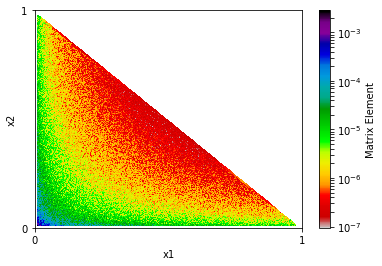

In [12]:
fig, ax = plt.subplots()
im = ax.pcolor(grid, cmap = 'nipy_spectral_r', norm = colors.LogNorm()) #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x1')

In [8]:
def analytic_me(q1, q2, p1, p2, p3):
    constants = 1
    return constants*(m_prod(p1, q1)**2 + m_prod(p1, q2)**2 + m_prod(p2, q1)**2 + m_prod(p2, q2)**2)/(m_prod(p1, p3)*m_prod(p2, p3))

In [9]:
print(momentum[2])
print(analytic_me(*momentum[2])/me[2])


[[ 500.            0.            0.          500.        ]
 [ 500.            0.            0.         -500.        ]
 [ 192.85568202 -112.9647206   151.79019507  -37.30982002]
 [ 399.15658211   99.79446484   68.71569135  380.32248893]
 [ 407.98773587   13.17025576 -220.50588642 -343.01266892]]
447.4437948694191


In [13]:
ka,kb,k1,k2,k3 = momentum[2]
swapped = [ka,kb, k3,k2,k1]
print(analytic_me(*momentum[2]))
analytic_me(*swapped)

5.529835173358089


31.68948994824754

In [ ]:
## for i in range(40):
    print(analytic_me(*momentum[i])/me[i])

In [24]:
momentum[13]

array([[ 500.        ,    0.        ,    0.        ,  500.        ],
       [ 500.        ,    0.        ,    0.        , -500.        ],
       [ 479.35917912,  146.40778139, -434.48915664, -139.88980278],
       [ 236.31756363, -159.47134257,  171.15666455,   33.47055363],
       [ 284.32325725,   13.06356118,  263.33249209,  106.41924915]])

In [29]:
print(sum([(analytic_me(*momenta)/S[0] - me[i])**2 for i, momenta in enumerate(momentum)])/len(me))

1.014279938213076e-09


In [ ]:
analytic_grid = analytic_me()

In [ ]:
fig, ax = plt.subplots()

im = ax.pcolor(grid, cmap = 'nipy_spectral_r') #color map of coord grid
cbar = ax.figure.colorbar(im)
cbar.set_label('Matrix Element')

ax.set_xticks([0, 500])
ax.set_xticklabels([0, 1])
ax.set_yticks([0, 500])
ax.set_yticklabels([0, 1])


ax.set_ylabel('x2')
ax.set_xlabel('x1')

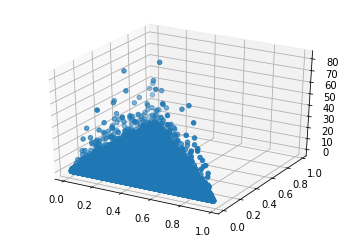

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, me, marker='o')

In [3]:
print(np.mean(me))

5.810622504326175e-06


In [5]:
print(np.std(me))

3.131324052641702e-05
